In [9]:
import torch
from torch import nn

In [11]:
batch_size = 7
hidden_size = 8
num_layers = 2
input_size = 1
seq_len = 1
rnn = nn.RNN(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
input = torch.rand((batch_size,seq_len,input_size))
h_0 = torch.rand((num_layers,batch_size,hidden_size))
output, h_n = rnn.forward(input,h_0)

In [13]:
output.shape, h_n.shape

(torch.Size([7, 1, 8]), torch.Size([2, 7, 8]))

In [15]:
h_n[-1],output[:,0,:]

(tensor([[ 0.6085, -0.9101, -0.4117, -0.0262,  0.0301, -0.0717, -0.6501, -0.2016],
         [-0.0264, -0.8781, -0.3877,  0.0744,  0.0205,  0.1201, -0.6629, -0.0488],
         [ 0.3324, -0.8538, -0.0284,  0.1119,  0.2347,  0.1847, -0.4345,  0.3302],
         [ 0.4883, -0.9191, -0.1585,  0.1035, -0.2342, -0.1949, -0.7063, -0.2319],
         [-0.0426, -0.8053,  0.1477,  0.1946, -0.1347,  0.2069, -0.5110,  0.3715],
         [ 0.1532, -0.7824, -0.0335,  0.1147, -0.1141,  0.0126, -0.7203, -0.1193],
         [ 0.0964, -0.8260, -0.2471, -0.1181,  0.3868,  0.4634, -0.3215,  0.1258]],
        grad_fn=<SelectBackward>),
 tensor([[ 0.6085, -0.9101, -0.4117, -0.0262,  0.0301, -0.0717, -0.6501, -0.2016],
         [-0.0264, -0.8781, -0.3877,  0.0744,  0.0205,  0.1201, -0.6629, -0.0488],
         [ 0.3324, -0.8538, -0.0284,  0.1119,  0.2347,  0.1847, -0.4345,  0.3302],
         [ 0.4883, -0.9191, -0.1585,  0.1035, -0.2342, -0.1949, -0.7063, -0.2319],
         [-0.0426, -0.8053,  0.1477,  0.1946, -0.13

In [1]:
import deepSI

In [17]:
from deepSI.fit_systems import System_encoder_RNN, System_encoder

In [10]:
train,test = deepSI.datasets.Cascaded_Tanks()

In [11]:
sys = System_encoder_RNN()

In [5]:
sys.optimizer = sys.init_optimizer(sys.init_nets(None,None))

In [6]:
sys.checkpoint_load_system()

In [12]:
sys.fit(train,sim_val=test,batch_size=32,epochs=100)

########## new best ###########
N_training_samples=980, batch_size=32, N_batch_updates_per_epoch=30


########## new best ###########
epoch=0 NRMS= 99.3951% Loss=0.89042
########## new best ###########
epoch=1 NRMS= 98.2165% Loss=0.65506
########## new best ###########
epoch=2 NRMS= 85.3080% Loss=0.33265
########## new best ###########
epoch=3 NRMS= 70.5597% Loss=0.10140
########## new best ###########
epoch=4 NRMS= 49.0074% Loss=0.04950
########## new best ###########
epoch=5 NRMS= 43.0338% Loss=0.03612
epoch=6 NRMS= 47.5889% Loss=0.02866
########## new best ###########
epoch=7 NRMS= 36.6843% Loss=0.02587
########## new best ###########
epoch=8 NRMS= 30.8598% Loss=0.02251
########## new best ###########
epoch=9 NRMS= 29.8129% Loss=0.02030
########## new best ###########
epoch=10 NRMS= 24.0425% Loss=0.01656
########## new best ###########
epoch=11 NRMS= 23.7580% Loss=0.01623
########## new best ###########
epoch=12 NRMS= 23.5767% Loss=0.01503
epoch=13 NRMS= 28.9247% Loss=0.01757
########## new best ###########
epoch=14 NRMS= 19.7712% Loss=0.01677
epoch=15 NRMS= 35.1723% Loss=0.01268
ep

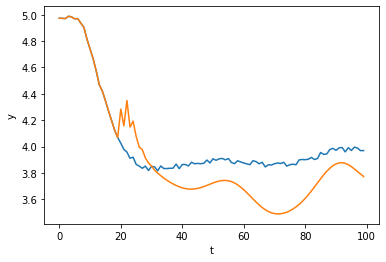

In [13]:
test[:100].plot()
sys.apply_experiment(test)[:100].plot(show=True)

In [14]:
sys.n_step_error(train)

array([0.05738281, 0.0710358 , 0.07010759, 0.06542909, 0.07295832,
       0.07067592, 0.07542659, 0.08010331, 0.08309677, 0.08708222,
       0.08976912, 0.09204535, 0.09426057, 0.09603353, 0.09775416,
       0.0994557 , 0.10106071, 0.10281232, 0.10470398, 0.10674598,
       0.10892444, 0.11134532, 0.11390522, 0.11666036, 0.11950817,
       0.1224199 , 0.1254141 , 0.12841799, 0.13146039, 0.13453216,
       0.13767091, 0.14090282, 0.14418609, 0.14761747, 0.15112165,
       0.15465846, 0.15819548, 0.16173774, 0.16527599, 0.168801  ,
       0.17227208, 0.1755757 , 0.17876748, 0.1817282 , 0.18449192,
       0.18704733, 0.18939531, 0.1914956 , 0.19336726, 0.19504766,
       0.19651232, 0.19780988, 0.19893561, 0.19987142, 0.20065229,
       0.20122021, 0.20165231, 0.20188807, 0.20196005, 0.20188658,
       0.20170291, 0.2014254 , 0.2011012 , 0.20070302, 0.20028931,
       0.19987636, 0.19947588, 0.19909758, 0.19875259, 0.19842539,
       0.19813615, 0.19786517, 0.19763684, 0.1974267 , 0.19723

In [20]:
sys_data_deepSI = deepSI.datasets.WienerHammerBenchMark(split_data=False)#sys_data_deepSI[:134020], sys_data_deepSI[134020:]
sys_train,sys_test = sys_data_deepSI[:134020], sys_data_deepSI[134020:]

In [21]:
sys_deepSI = System_encoder(nx=8,na=50,nb=50)

In [22]:
sys_deepSI.fit(sys_train, epochs=100, verbose=1, batch_size=1024, Loss_kwargs=dict(nf=30), sim_val=sys_test[:5000])

########## new best ###########
N_training_samples=133941, batch_size=1024, N_batch_updates_per_epoch=130


########## new best ###########
epoch=0 NRMS= 21.0352% Loss=0.31265
########## new best ###########
epoch=1 NRMS= 10.8983% Loss=0.01522

stopping early due to KeyboardInterrupt


In [23]:
sys = System_encoder_RNN()

In [25]:
sys.fit(sys_train, epochs=100, verbose=1, batch_size=1024, Loss_kwargs=dict(nf=30))

########## new best ###########
N_training_samples=2, batch_size=2, N_batch_updates_per_epoch=1


epoch=0 NRMS=  0.6372% Loss=0.00058
epoch=1 NRMS=  0.7295% Loss=0.00078
epoch=2 NRMS= 12.5307% Loss=0.01006
epoch=3 NRMS=134.5562% Loss=0.40560
epoch=4 NRMS=  8.4986% Loss=2.38661
epoch=5 NRMS= 53.7342% Loss=0.14707
epoch=6 NRMS= 24.1419% Loss=1.08564
epoch=7 NRMS= 58.7566% Loss=0.27286
epoch=8 NRMS=116.1329% Loss=0.08324
epoch=9 NRMS=136.4098% Loss=0.32541
epoch=10 NRMS=126.3414% Loss=0.31802
epoch=11 NRMS=108.9336% Loss=0.17048
epoch=12 NRMS= 96.2121% Loss=0.07823
epoch=13 NRMS= 90.3455% Loss=0.07446
epoch=14 NRMS= 89.5593% Loss=0.11659
epoch=15 NRMS= 91.8409% Loss=0.15680
epoch=16 NRMS= 96.2515% Loss=0.16863
epoch=17 NRMS=102.7002% Loss=0.15037
epoch=18 NRMS=111.2542% Loss=0.11512
epoch=19 NRMS=121.6383% Loss=0.07917
epoch=20 NRMS=133.0436% Loss=0.05460
epoch=21 NRMS=144.1782% Loss=0.04634
epoch=22 NRMS=153.5280% Loss=0.05183
epoch=23 NRMS=159.7970% Loss=0.06281
epoch=24 NRMS=162.3707% Loss=0.06938
epoch=25 NRMS=161.5404% Loss=0.06518
epoch=26 NRMS=158.3380% Loss=0.05079
epoch=27 NR